In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import keras
from keras import layers
from keras.models import Model
from keras.layers import Input, merge, ZeroPadding2D
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import keras.backend as K
import keras.backend as K 
from keras.callbacks import ModelCheckpoint 
import pandas as pd
import numpy as np 
import itertools
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import math 
import datetime
import time
from keras.applications.imagenet_utils import decode_predictions 
from scipy import misc 
from PIL import Image
import glob
import scipy.misc 
from matplotlib.pyplot import imshow 
from IPython.display import SVG 
import seaborn as sn 
import pandas as pd 
import pickle 
from keras.applications.imagenet_utils import decode_predictions 
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.layers import Input, Conv2D, Dense, concatenate
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

In [4]:
#f1, recall, and precision metrics
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [5]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (512, 512, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'softmax'))

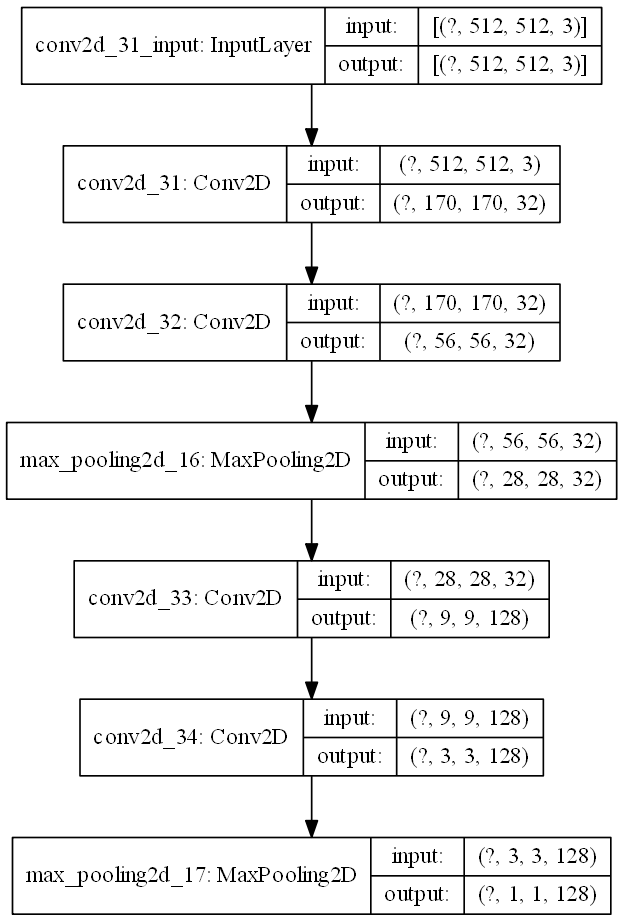

In [21]:
keras.utils.plot_model(classifier, 'burnnet.png',show_shapes = True, show_layer_names = True, dpi = 120)

In [6]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'categorical_accuracy', get_f1, recall_m, precision_m])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

batch_size = 10
nb_epoch = 20

training_set = train_datagen.flow_from_directory('Train/', target_size = (512, 512), batch_size = batch_size)

test_set = test_datagen.flow_from_directory('Test/', target_size = (512, 512), batch_size = batch_size)

#checkpoint = ModelCheckpoint("best_model.hdf5", monitor='accuracy', verbose=1, save_best_only=True, mode='max', period=1)

history = classifier.fit_generator(training_set, epochs = nb_epoch, validation_data = test_set)

Found 3035 images belonging to 3 classes.
Found 757 images belonging to 3 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
304/304 [==============================] - 42s 137ms/step - loss: 0.5051 - accuracy: 0.6059 - categorical_accuracy: 0.6059 - get_f1: 0.5145 - recall_m: 0.4461 - precision_m: 0.6612 - val_loss: 0.4644 - val_accuracy: 0.6697 - val_categorical_accuracy: 0.6697 - val_get_f1: 0.6629 - val_recall_m: 0.6179 - val_precision_m: 0.7211
Epoch 2/20
304/304 [==============================] - 41s 134ms/step - loss: 0.4057 - accuracy: 0.7272 - categorical_accuracy: 0.7272 - get_f1: 0.7145 - recall_m: 0.6836 - precision_m: 0.7537 - val_loss: 0.3879 - val_accuracy: 0.7450 - val_categorical_accuracy: 0.7450 - val_get_f1: 0.7045 - val_recall_m: 0.6528 - val_precision_m: 0.7712
Epoch 3/20
304/304 [==============================] - 40s 132ms/step - loss: 0.3245 - accuracy: 0.7951 - categorical_accuracy: 0.7951 - get_f1: 0.7895 - recall_m: 

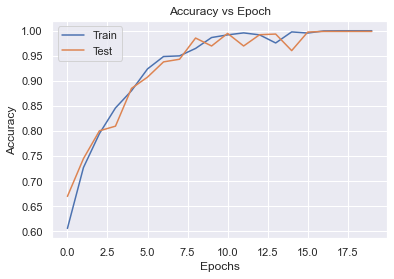

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.savefig('model_acc.jpg')
plt.show()

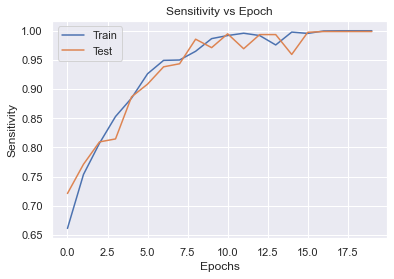

In [8]:
plt.plot(history.history['precision_m'])
plt.plot(history.history['val_precision_m'])
plt.title('Sensitivity vs Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.ylabel('Sensitivity')
plt.xlabel('Epochs')
plt.savefig('model_sens.png')
plt.show()

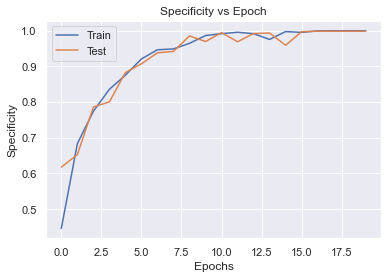

In [9]:
plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])
plt.title('Specificity vs Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.ylabel('Specificity')
plt.xlabel('Epochs')
plt.savefig('model_spe.png')
plt.show()

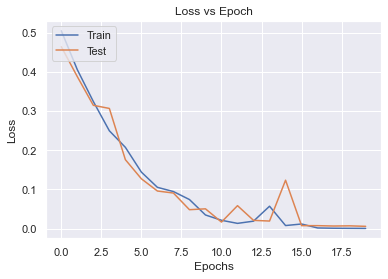

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.savefig('model_loss.png')
plt.show()

In [32]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'categorical_accuracy', 'get_f1', 'recall_m', 'precision_m', 'val_loss', 'val_accuracy', 'val_categorical_accuracy', 'val_get_f1', 'val_recall_m', 'val_precision_m'])
